### Importing all the necessary Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from math import sqrt
import seaborn as sns

In [2]:
os.chdir('F:\\MachineLearning\\Practise3')

**Loading all the training and test dataset and file for final output**

In [3]:
training_data = pd.read_csv('Train.txt')

## Data Pre-processing

**_Understanding Training Data_**

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
training_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
training_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [7]:
training_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
training_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
training_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [10]:
training_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

**Manipulating as necessary - Imputing the Missing values and handling values of some columns**

In [11]:
cond1 = np.logical_or(training_data['Item_Fat_Content'] == 'low fat', training_data['Item_Fat_Content'] == 'LF')
cond2 = (training_data['Item_Fat_Content'] == 'reg')
training_data['Item_Fat_Content'] = np.where(cond1, 'Low Fat', training_data['Item_Fat_Content'])
training_data['Item_Fat_Content'] = np.where(cond2, 'Regular', training_data['Item_Fat_Content'])

**Outlet_Size** and **Item_Weight** both of the columns have more than 1000 `Null` values.<br><br> It means we cannot afford to delete those values because it will lead to the elimination of more than 10% of the data and that we don't want hence we will go for **`imputing` the missing values**<br><br> Item_Weight is of the type `float` and hence we would replace `NaN` values by the mean and Outlet_Size is of type `object` and hence we have some unique value inside it so it make sense to replce `NaN` values with `mode` of the values in the columns

In [12]:
training_data['Item_Weight'].fillna(training_data['Item_Weight'].mean(), inplace = True)

In [13]:
training_data['Outlet_Size'].fillna(training_data['Outlet_Size'].mode()[0], inplace = True)

Since, Item_Identifier `col` and Outlet_Identifier `col` does not contribute in predicting the **Item_Outlet_Sales**, we will just drop it.

In [14]:
training_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

### Exploratory Data Analysis

In [15]:
outType = training_data.groupby('Outlet_Type').sum()

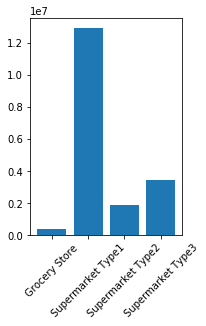

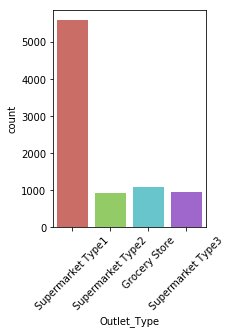

In [16]:
plt.subplot(1,2,2)
plt.bar(outType.index, outType['Item_Outlet_Sales'])
plt.xticks(rotation = 45)
plt.show()

plt.subplot(1,2,1)
chart = sns.countplot(x = training_data['Outlet_Type'], data = training_data, palette = 'hls')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [17]:
locType = training_data.groupby('Outlet_Location_Type').sum()

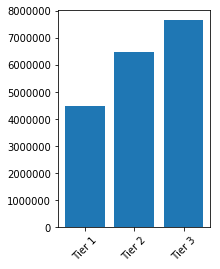

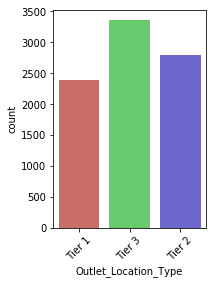

In [18]:
plt.subplot(1,2,2)
plt.bar(locType.index, locType['Item_Outlet_Sales'])
plt.xticks(rotation = 45)
plt.show()

plt.subplot(1,2,1)
chart = sns.countplot(x = training_data['Outlet_Location_Type'], data = training_data, palette = 'hls')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

**Creating Dummies**

In [19]:
for var in training_data.select_dtypes(include=[object]).columns:
    cat_list = pd.get_dummies(training_data[var], prefix=var)
    data1 = training_data.join(cat_list)
    training_data = data1

In [20]:
cat_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type']
data_vars = training_data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]
training_data = training_data[to_keep]

**Splitting into Training and Testing**

In [21]:
X = training_data.loc[:, training_data.columns != 'Item_Outlet_Sales'].values
Y = training_data.loc[:, 'Item_Outlet_Sales'].values

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [23]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Applying Algorithm and finding RMSE**

In [24]:
rmse_val = []
for k in range(20):
    k = k + 1
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test, Y_pred))
    rmse_val.append(error)

In [25]:
min(rmse_val)

1217.3177945690418

**Data Visualization -> K-Value vs RMSE**

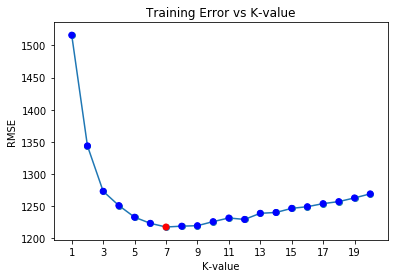

In [26]:
ymin = np.min(rmse_val)
mask = np.array(rmse_val) == ymin
color = np.where(mask, 'red', 'blue')
plt.plot(range(1,21,1),rmse_val, linestyle='-', marker='o', zorder = 1)
plt.scatter(range(1,21,1),rmse_val, color=color, zorder = 2)
plt.xticks(np.arange(1, 21, 2))
plt.xlabel('K-value')
plt.ylabel('RMSE')
plt.title('Training Error vs K-value')
plt.show()

**Checking with GridSearchCV**

In [27]:
n_neigh = {'n_neighbors':[3,5,7,9]}
model_check = KNeighborsRegressor()

model = GridSearchCV(model_check, n_neigh, cv=5)
model.fit(X_train, Y_train)
model.best_params_

{'n_neighbors': 7}

**Checking Variance with K=7**

Now since we have figured out which is the **ideal K** for our data, let us see how it has performed over the actual values!!

In [28]:
model = KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [29]:
Y_test

array([1426.1436, 1201.769 , 1836.2764, ..., 2885.5772,  218.3824,
       5478.2024])

In [30]:
Y_pred

array([1979.32828571, 1675.62837143, 2086.99765714, ..., 2339.24074286,
        165.30862857, 5858.08885714])

If we check how much variance is been explained by the `Y_pred` with respect to the `Y_test`, we noticed that it is just **49.4%**<br><br>
The explained varianced obtained is very less thus we can safely say, we should compare some other Regression algorithm to explain the variance by a better percentage value.

In [31]:
explained_variance_score(Y_test, Y_pred)

0.49379990294648124